## Importar librerías

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

## 1. Carga de los datos

In [3]:
df = pd.read_csv('final_preprocessed.csv', encoding='UTF-8', sep=",")

In [4]:
# Dimensiones del dataframe
df.shape

(5338, 68)

In [5]:
# Drop first column
df = df.drop(df.columns[0], axis=1)
df.sample(5) # Muestra aleatoria


,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,Road_Type_1SoloSentido,Road_Type_Autovia,Road_Type_Calzada,Road_Type_Circunvalacion,Road_Type_Desconocida,Road_Type_Rotonda,Speed_limit_15.0,Speed_limit_20.0,Speed_limit_30.0,Speed_limit_40.0,Speed_limit_50.0,Speed_limit_60.0,Speed_limit_70.0,Light_Conditions_Diurna,Light_Conditions_Oscuridad_Iluminacion_Desconocida,Light_Conditions_Oscuridad_Luces_Apagadas,Light_Conditions_Oscuridad_Luces_Encendidas,Light_Conditions_Oscuridad_Sin_Iluminacion,"Weather_Conditions_Bien, con vientos fuertes","Weather_Conditions_Bien, con vientos suaves",Weather_Conditions_Desconocido,Weather_Conditions_Lluvioso,"Weather_Conditions_Lluvioso, con vientos fuertes",Weather_Conditions_Nevando,"Weather_Conditions_Nevando, con vientos fuertes",Weather_Conditions_Niebla,Weather_Conditions_Otro,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urbano,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_No se reporto,Did_Police_Officer_Attend_Scene_of_Accident_Si,Junction_Detail_+4salidas,Junction_Detail_Carretera_Acceso,Junction_Detail_Encrucijada,Junction_Detail_Entrada_Privada,Junction_Detail_Minirotonda,Junction_Detail_No_hay_cruce,Junction_Detail_Otros,Junction_Detail_Rotonda,Junction_Detail_T,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
2459,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3603,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1073,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4919,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1424,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## 2. Algoritmo de k-means

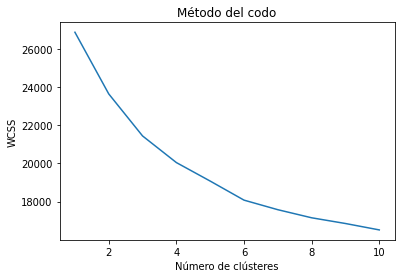

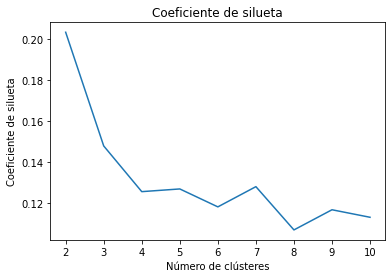

In [6]:
from sklearn.cluster import KMeans
import pandas as pd

# Preparar los datos
X = df.values
columns = df.columns


# Elegir el número de clústeres utilizando el método del codo
import matplotlib.pyplot as plt
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

# Elegir el número de clústeres utilizando el coeficiente de silueta
from sklearn.metrics import silhouette_score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(range(2, 11), silhouette_scores)
plt.title('Coeficiente de silueta')
plt.xlabel('Número de clústeres')
plt.ylabel('Coeficiente de silueta')
plt.show()


,Time_Madrugada,Time_Mañana,Time_Noche,Time_Tarde,Number_of_Casualties_1,Number_of_Casualties_2,Number_of_Casualties_3,Number_of_Casualties_4,Day_of_Week_Día laboral,Day_of_Week_Fin de semana,Road_Type_1SoloSentido,Road_Type_Autovia,Road_Type_Calzada,Road_Type_Circunvalacion,Road_Type_Desconocida,Road_Type_Rotonda,Speed_limit_15.0,Speed_limit_20.0,Speed_limit_30.0,Speed_limit_40.0,Speed_limit_50.0,Speed_limit_60.0,Speed_limit_70.0,Light_Conditions_Diurna,Light_Conditions_Oscuridad_Iluminacion_Desconocida,Light_Conditions_Oscuridad_Luces_Apagadas,Light_Conditions_Oscuridad_Luces_Encendidas,Light_Conditions_Oscuridad_Sin_Iluminacion,"Weather_Conditions_Bien, con vientos fuertes","Weather_Conditions_Bien, con vientos suaves",Weather_Conditions_Desconocido,Weather_Conditions_Lluvioso,"Weather_Conditions_Lluvioso, con vientos fuertes",Weather_Conditions_Nevando,"Weather_Conditions_Nevando, con vientos fuertes",Weather_Conditions_Niebla,Weather_Conditions_Otro,Road_Surface_Conditions_-1,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Urban_or_Rural_Area_Rural,Urban_or_Rural_Area_Urbano,Did_Police_Officer_Attend_Scene_of_Accident_No,Did_Police_Officer_Attend_Scene_of_Accident_No se reporto,Did_Police_Officer_Attend_Scene_of_Accident_Si,Junction_Detail_+4salidas,Junction_Detail_Carretera_Acceso,Junction_Detail_Encrucijada,Junction_Detail_Entrada_Privada,Junction_Detail_Minirotonda,Junction_Detail_No_hay_cruce,Junction_Detail_Otros,Junction_Detail_Rotonda,Junction_Detail_T,Number_of_Vehicles_1,Number_of_Vehicles_2,Accident_Severity_Fatal,Accident_Severity_Leve,Accident_Severity_Serio,Road_Surface_Condition_Hielo,Road_Surface_Condition_Húmeda,Road_Surface_Condition_Inundadas,Road_Surface_Condition_Nieve,Road_Surface_Condition_Seca
0,-1.084202e-18,0.331028,0.239130,0.429842,0.945652,0.052372,0.001976,3.794708e-19,0.687747,0.312253,0.007905,0.046443,0.891304,0.000988,0.022727,0.030632,1.897354e-19,0.012846,0.347826,0.151186,0.057312,0.410079,0.020751,0.877470,0.010870,0.006917,0.043478,0.061265,0.015810,0.944664,0.024704,0.001976,-6.938894e-18,-2.168404e-18,1.897354e-19,1.734723e-18,0.012846,5.928854e-03,9.505929e-01,3.608225e-16,1.517883e-18,0.043478,1.897354e-19,0.999012,0.000988,0.141304,0.000988,0.857708,0.002964,0.003953,0.010870,0.006917,0.001976,0.794466,0.025692,0.037549,0.115613,0.998024,1.976285e-03,0.050395,4.624506e-01,4.871542e-01,0.043478,3.608225e-16,1.897354e-19,1.517883e-18,0.956522
1,1.098901e-03,0.338462,0.306593,0.353846,0.924176,0.072527,0.002198,1.098901e-03,0.692308,0.307692,0.048352,0.061538,0.835165,0.001099,0.016484,0.037363,1.626303e-19,0.073626,0.708791,0.074725,0.020879,0.119780,0.002198,0.641758,0.013187,0.006593,0.293407,0.045055,0.017582,0.508791,0.016484,0.346154,5.054945e-02,7.692308e-03,1.626303e-19,7.692308e-03,0.045055,-1.214306e-17,1.110223e-16,9.901099e-01,3.296703e-03,0.005495,1.098901e-03,0.279121,0.720879,0.185714,0.002198,0.812088,0.007692,0.001099,0.073626,0.007692,0.009890,0.517582,0.043956,0.047253,0.291209,1.000000,-6.505213e-19,0.020879,6.241758e-01,3.549451e-01,0.005495,9.901099e-01,1.098901e-03,3.296703e-03,0.000000
2,1.646091e-03,0.312757,0.274074,0.411523,0.858848,0.139506,0.001235,4.115226e-04,0.745267,0.254733,0.060905,0.060905,0.819753,0.004938,0.032510,0.020988,4.115226e-04,0.064198,0.906996,0.022634,0.003292,0.002058,0.000412,0.808230,0.014403,0.002469,0.168724,0.006173,0.009465,0.935391,0.044444,0.001235,-2.081668e-17,1.234568e-03,-7.860466e-19,-1.084202e-18,0.008230,2.386831e-02,9.650206e-01,6.106227e-16,1.234568e-03,0.009877,-7.860466e-19,0.006996,0.993004,0.271605,0.013169,0.715226,0.015226,0.001646,0.115226,0.006996,0.008230,0.439506,0.032922,0.032922,0.347325,1.000000,1.084202e-18,0.001646,9.983539e-01,-7.771561e-16,0.009877,6.106227e-16,-7.860466e-19,1.234568e-03,0.988889
3,1.014199e-03,0.284990,0.294118,0.419878,0.846856,0.152130,0.001014,3.252607e-19,0.724138,0.275862,0.053753,0.061866,0.83265

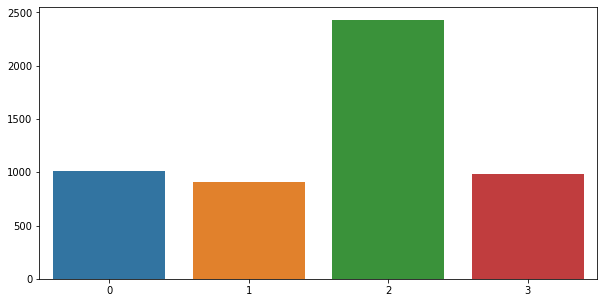

In [7]:
# Entrenar el modelo K-Means
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(X)
cols_number = df.to_numpy()
labels = kmeans.labels_
df['cluster'] = labels

cluster_distrib = df['cluster'].value_counts()
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=cluster_distrib.index, y=cluster_distrib.values)

# Centroides de los clústeres
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=columns)
centroids

In [9]:
from kmeans_feature_imp import KMeansInterp

n_clusters = len(df['cluster'].unique())
kmeans_interp = KMeansInterp(n_clusters=n_clusters, random_state=1, feature_importance_method='wcss_min', ordered_feature_names=columns).fit(X)
kmeans_interp.feature_importances_

{0: [('Number_of_Vehicles_1', 1.0),
  ('Road_Surface_Condition_Húmeda', 0.9901098901098908),
  ('Road_Surface_Conditions_2', 0.9901098901098908),
  ('Number_of_Casualties_1', 0.9241758241758241),
  ('Road_Type_Calzada', 0.8351648351648352),
  ('Did_Police_Officer_Attend_Scene_of_Accident_Si', 0.8120879120879121),
  ('Urban_or_Rural_Area_Urbano', 0.7208791208791209),
  ('Speed_limit_30.0', 0.7087912087912087),
  ('Day_of_Week_Día laboral', 0.6923076923076923),
  ('Light_Conditions_Diurna', 0.6417582417582417),
  ('Accident_Severity_Leve', 0.6241758241758242),
  ('Junction_Detail_No_hay_cruce', 0.5175824175824175),
  ('Weather_Conditions_Bien, con vientos suaves', 0.5087912087912085),
  ('Accident_Severity_Serio', 0.3549450549450549),
  ('Time_Tarde', 0.3538461538461538),
  ('Weather_Conditions_Lluvioso', 0.3461538461538463),
  ('Time_Mañana', 0.3384615384615385),
  ('Day_of_Week_Fin de semana', 0.3076923076923077),
  ('Time_Noche', 0.3065934065934066),
  ('Light_Conditions_Oscuridad_Luc